In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.special import comb
from scipy.stats import bernoulli
from scipy.stats import beta
import math
p=0.8
n=100
q=0
s=[]
t=[]
for i in range(0,100):
    r = bernoulli.rvs(p, size=n)
    s.append((np.sqrt(n)*r.mean()+1/2)/(1+np.sqrt(n)))
    t.append(r.mean())
    if (abs(p-r.mean())>abs(p-(np.sqrt(n)*r.mean()+1/2)/(1+np.sqrt(n)))):
        q+=1
print(q/100)

0.31


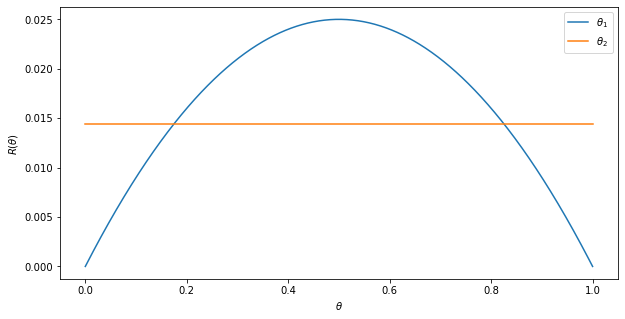

In [6]:
p=0.5
n=10
q=0
r = bernoulli.rvs(p, size=n)
s=((np.sqrt(n)*r.mean()+1/2)/(1+np.sqrt(n)))
t=(r.mean())
#plt.figure(figsize = (8,6))
#sb.distplot(t, label = '${\theta_1}$ ') 
#sb.distplot(s, label = '$\^{\theta_2}$ ') 
#plt.legend()
#plt.show()
plt.figure(figsize=(10,5))
x = np.linspace(0, 1 , 1000)
plt.plot(x,x*(1-x)/n,label = r'${\theta_1}$ ')
plt.plot(x,1/(4*(1+np.sqrt(n))**2)+x-x,label = r'${\theta_2}$ ')
plt.legend()
plt.xlabel(r'${\theta}$ ')
plt.ylabel(r'${R(\theta)}$ ')
plt.show()

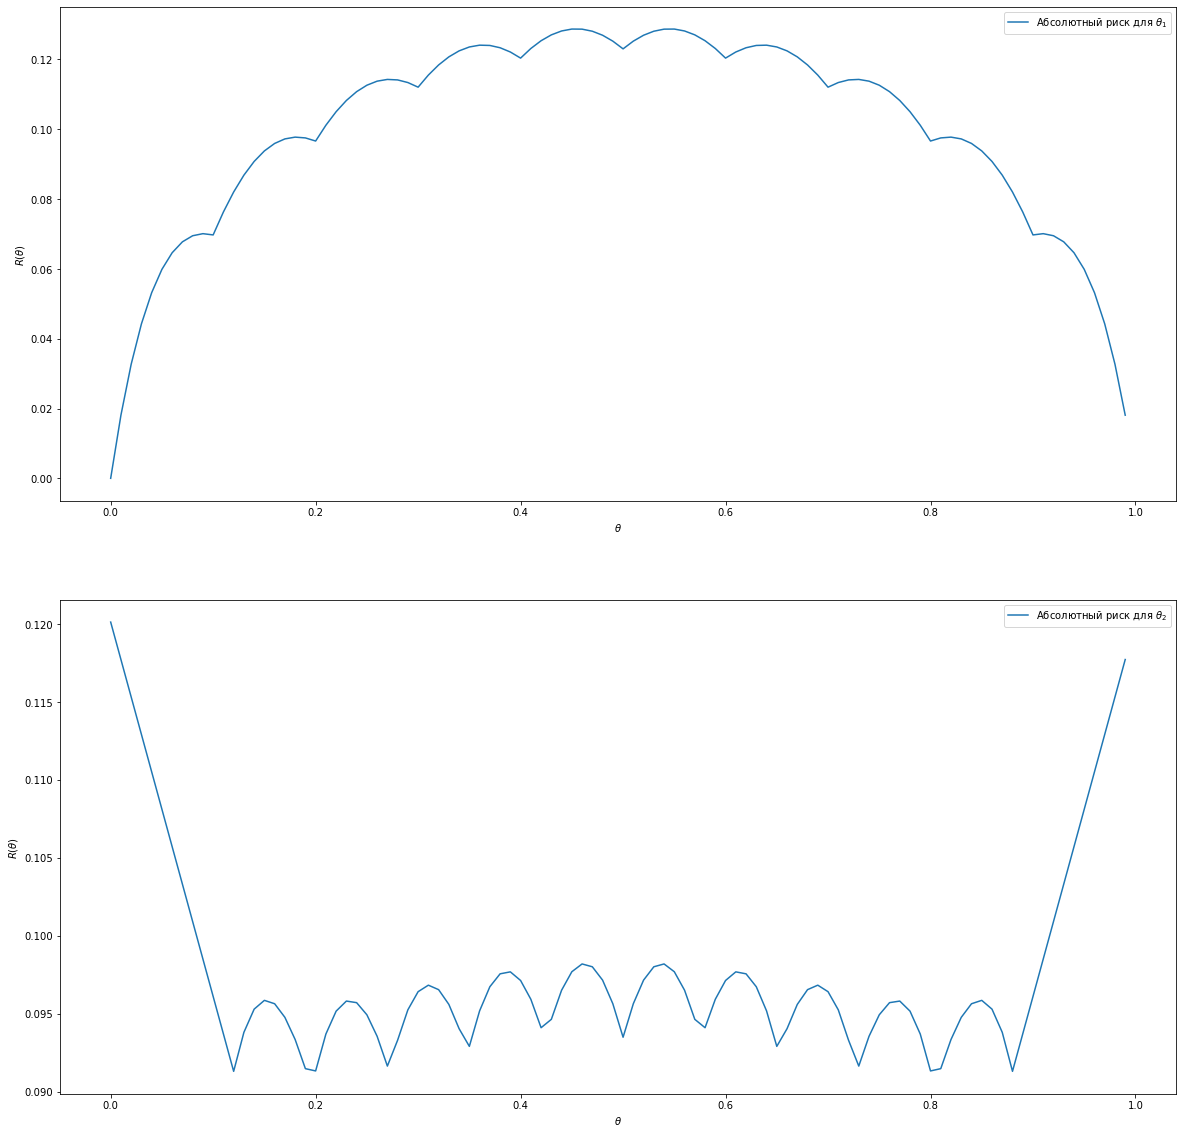

In [21]:
def R1(p,n):
    result = 0
    for k in range(n+1):
        result += np.abs((k/n - p)) * comb(n,k) * p**(k) *(1-p)**(n-k)
    return result
def R2(p,n):
    result = 0
    for k in range(n+1):
        result += np.abs((k/n + (1/2 - k/n)/(1+n**(1/2)) - p)) * comb(n,k) * p**(k) *(1-p)**(n-k)
    return result
plt.figure( figsize= (20,20))
p = 0.8
x = np.arange(0, 1, 0.01)
R_Theta1 = list(map(lambda x: R1(x, n),x))
plt.subplot(2, 1, 1)
plt.plot(x, R_Theta1,label = r"Абсолютный риск для $\theta_1$")
plt.legend()
R_Theta2 = list(map(lambda x: R2(x, n),x))
plt.xlabel(r'${\theta}$ ')
plt.ylabel(r'${R(\theta)}$ ')
plt.subplot(2, 1, 2)
plt.plot(x, R_Theta2,label = r"Абсолютный риск для $\theta_2$")
plt.xlabel(r'${\theta}$ ')
plt.ylabel(r'${R(\theta)}$ ')
plt.legend()
plt.show()
